In [69]:
import itertools
import pandas as pd
import sklearn.datasets
import sklearn.tree
import sklearn.model_selection
import sklearn.metrics
from IPython.display import Image

# 2 question

2. Design a two-input perceptron that implements the boolean function 𝐴∧¬𝐵. Design a two-layer network of perceptrons that implements 𝐴 ⊕ 𝐵 (where ⊕ is XOR).

In [8]:
def a_and_not_b(inp):
    w1, w2, b = 1, -1, -1
    return w1*inp[0] + w2*inp[1] + b >= 0

In [9]:
for inp in itertools.product([0, 1], [0, 1]):
    print(inp, ' - ', a_and_not_b(inp))

(0, 0)  -  False
(0, 1)  -  False
(1, 0)  -  True
(1, 1)  -  False


In [18]:
def XOR_net(inp):
    # A, not B
    w11, w12, b1 = 1, -1, -1
    # B, not A
    w21, w22, b2 = -1, 1, -1
    # OR
    w31, w32, b3 = 1, 1, -1
    
    
    out1 = w11*inp[0] + w12*inp[1] + b1 >= 0
    out2 = w21*inp[0] + w22*inp[1] + b2 >= 0
    out3 = w31*int(out1) + w32*int(out2) + b3 >= 0
#     print(out1, out2, out3)
    return out3

In [19]:
for inp in itertools.product([0, 1], [0, 1]):
    print(inp, ' - ', XOR_net(inp))

(0, 0)  -  False
(0, 1)  -  True
(1, 0)  -  True
(1, 1)  -  False


# 4 question

To use a decision tree for a regression problem you can:  
- Look for the splits that minimize the mean squared error ( instead of entropy )
- Assign the mean of the values for the leafs.

Why mean? We should predict some value (x) in some leaf of size N to do as less error as we can.
$$\underset{c}{\operatorname{arg min}}{MSE}$$
$$MSE = \sum_{i}^{N}(c - y_i)^2 $$
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c - y_i)^2$$

$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c -E(y) + E(y) - y_i)^2$$
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}[(c - E(y))^2 + (E(y) - y_i)^2 - 2(c - E(y))(E(y) - y_i))]$$
We can ignore the second term because it doesn't depend on c and always postive
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}[(c - E(y))^2 - 2(c - E(y))(E(y) - y_i))]$$

$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c - E(y))^2 - \sum_{i}^{N}[2(c - E(y))(E(y) - y_i))]$$
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c - E(y))^2 - 2(c - E(y))\sum_{i}^{N}[(E(y) - y_i))]$$
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c - E(y))^2 - 2(c - E(y))E[(E(y) - y_i))]$$
As the expectation of the last term is zero all is left is
$$\underset{c}{\operatorname{arg min}}\sum_{i}^{N}(c - E(y))^2$$
$$c = E(y)$$

In [43]:
boston_df = sklearn.datasets.load_boston(return_X_y=False)

In [47]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    boston_df['data'], boston_df['target'], train_size=0.8, shuffle=True, random_state=13
)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [63]:
gridserach_cv = sklearn.model_selection.GridSearchCV(
    sklearn.tree.DecisionTreeRegressor(random_state=13), {'max_depth': range(1, 27, 2)}, cv=3, n_jobs=3)

In [64]:
g = gridserach_cv.fit(X_train, y_train)

In [68]:
preds = gridserach_cv.predict(X_test)

In [71]:
sklearn.metrics.mean_squared_error(y_test, preds)

19.867504233816863

# 6 question

In some cases a decision tree will do better, in some other cases - knn is the winner.  
- If the classes' points are very very close to each other and lie on the very edge of this separating line from the both sides but they are still linearly separable - the decision tree will do better with the line. It is because a decision tree somewhat builds lines that split the space - it is what we need. The cornerstone of the tree is lines that have a slope of $45^\circ$ are hard to approximate with only horizontal and vertical lines ( decision tree splits). The more the line slope is close to the $45^\circ$ the more splits the decision tree should do to approximate this line. But we still can deal with this applying rotation matrices to our feature space. We can try a couple of angles ($45^\circ$, $55^\circ$, $35^\circ$) and check if it helps the tree.

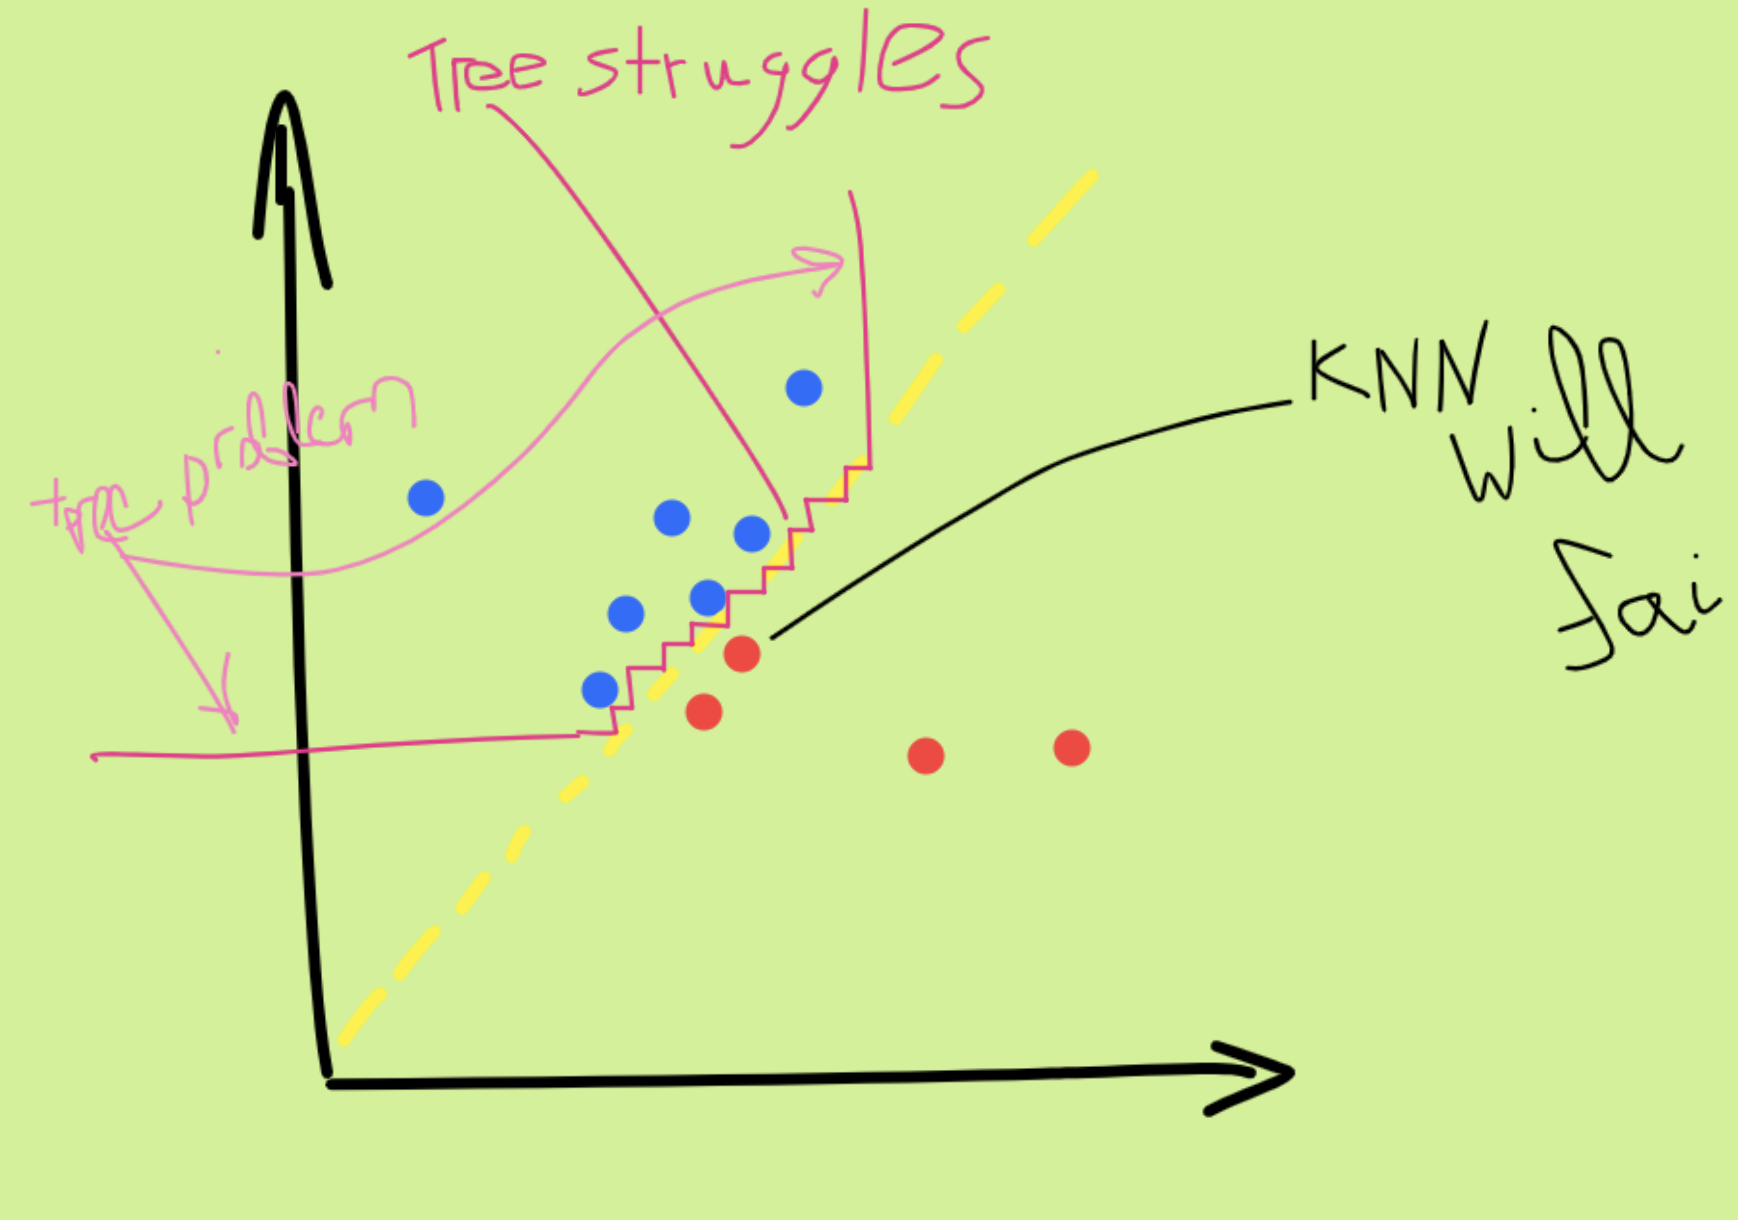

In [77]:
Image("./tree.png", width=450, height=450)

# 7

Both cases - an origin centered circle and an origin centered sphere - has VC dimensions of two. Because in both cases we have only two real parameters - the radius of the circle/sphere (controls the figure surface) and what class are supposed to be inside and outside of the surface.It regresses to the 1d case with the separating threshold with a similar pair of paremeters - the position of the separating point and what class are supposed to be on the left and what - on the right. 

# 3

The rules can be derived from the error function.

$$error = \sum_{i}^{N}(a(x_{i}\cdot\vec{w}) - y_{i})^2$$

$$\underset{w}{\operatorname{arg min}}error$$
$$\underset{w}{\operatorname{arg min}}\sum_{i}^{N}(a(x_{i}\cdot\vec{w}) - y_{i})^2$$

From here we should find a derivative

$$\frac{derror}{d\vec{w}} = \sum_{i}^{N}[2 * (a(x_{i}\cdot\vec{w}) - y_{i}) * \frac{da}{dw} * \frac{d(x_{i}\cdot\vec{w})}{dw})]$$

$$\frac{derror}{d\vec{w}} = \sum_{i}^{N}[2 * (a(x_{i}\cdot\vec{w}) - y_{i}) * \frac{da}{d\vec{w}} * \vec{w})]$$

Here the differences come. 
- The perceptron with a differentiable activation function outputs probability and has $\frac{da}{d\vec{w}}$ you can use the resulting error function derivative as $\Delta{w}$ scaling it with you learning rate to adjust the weights.
- The perceptron without a differentiable activation (sign function for a conventional perceptron) function hasn't this term, so I think the derivative is just ignored (taken as 1).

- I would prefer gradient descent with relu or sigmoid actiovation function as a general case, because its universal.  I would use the perceptron training rule if I know for sure that the classes are linearly separable. (rare case for me).